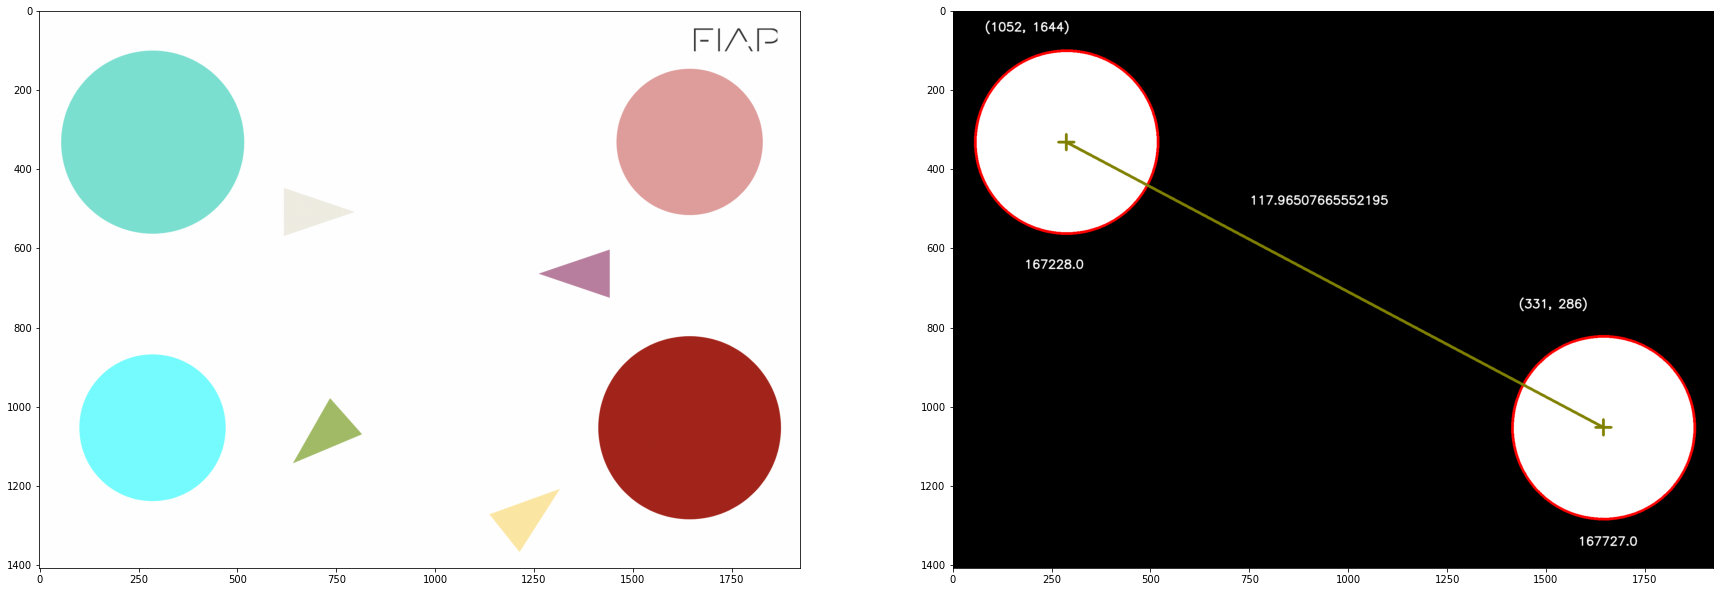

In [48]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

#variavel que guarda a imagem
img = cv2.imread("circulos.png")

#converto para rgb e depois hsv
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# definindo o range das cores e criando a primeira máscara
image_lower_hsv1 = np.array([80, 50, 110]) 
image_upper_hsv1 = np.array([86, 255, 255]) 
mask_hsv1 = cv2.inRange(img_hsv, image_lower_hsv1, image_upper_hsv1)

# definindo o range das cores e criando a segunda máscara
image_lower_hsv2 = np.array([0, 90, 60])
image_upper_hsv2 = np.array([2, 255, 255])
mask_hsv2 = cv2.inRange(img_hsv, image_lower_hsv2, image_upper_hsv2)

# defindo a máscara que utiliza a função bitwise para juntar as duas anteriores
img_hsv = cv2.bitwise_or(mask_hsv1, mask_hsv2, mask = None)


contornos, _ = cv2.findContours(img_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
mask_rgb = cv2.cvtColor(img_hsv, cv2.COLOR_GRAY2RGB) 
contornos_img = mask_rgb.copy()
cv2.drawContours(contornos_img, contornos, -1, [255, 0, 0], 5);


ct = contornos[0]
M = cv2.moments(ct)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

ct1 = contornos[1]
M1 = cv2.moments(ct1)
cx1 = int(M1['m10']/M1['m00'])
cy1 = int(M1['m01']/M1['m00'])


size = 20
color = (128,128,0)


cv2.line(contornos_img,(cx - size,cy),(cx + size,cy),color,5)
cv2.line(contornos_img,(cx,cy - size),(cx, cy + size),color,5)

cv2.line(contornos_img,(cx1 - size,cy1),(cx1 + size,cy1),color,5)
cv2.line(contornos_img,(cx1,cy1 - size),(cx1, cy1 + size),color,5)

font = cv2.FONT_HERSHEY_SIMPLEX

text = cy , cx
origem = (80,50)

text1 = cy1 , cx1
origem1 = (1430,750)

cv2.putText(contornos_img, str(text), origem, font,1,(255,255,255),2,cv2.LINE_AA)
cv2.putText(contornos_img, str(text1), origem1, font,1,(255,255,255),2,cv2.LINE_AA)


cv2.line(contornos_img,(cx,cy),(cx1,cy1),color,5)

area = cv2.contourArea(ct)
area1 = cv2.contourArea(ct1)


areapos = (180,650)
areapos1 = (1580,1350)
cv2.putText(contornos_img, str(area), areapos, font,1,(255,255,255),2,cv2.LINE_AA)
cv2.putText(contornos_img, str(area1), areapos1, font,1,(255,255,255),2,cv2.LINE_AA)


deltax = cx - cx1
deltay = cy - cy1
m = (deltax)/(deltay)
t = (np.arctan(m)*180)/np.pi
t2 = 180 - teta

angulopos = (750, 488)
cv2.putText(contornos_img, str(t2),angulopos, font, 1,(255,255,255),2,cv2.LINE_AA)

fig = plt.figure(figsize=(30,30))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(contornos_img, cmap="Greys_r", vmin=0, vmax=255)
plt.show()